## Import libraries needed

In [1]:
import re
import pandas as pd
import numpy as np
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

## Dataframe overview

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Preprocess

In [8]:
df_train['text'][0].split(' ') #list of words

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

In [9]:
len(df_train['text'][0].split(' '))

13

Create function to count word of each text

In [10]:
def count_word(text):
    list_of_word = text.split(' ')
    n_words = len(list_of_word) 
    return n_words

Add new column name 'word_count' that contains output of 'count_word' function

In [11]:
for data in [df_train, df_test]:
    data['word_count'] = data['text'].apply(count_word)

In [12]:
df_train.head()

,id,keyword,location,text,target,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17


Create function to count unique word of each text

In [13]:
def unique_word_count(text):
    list_of_word = text.split(' ')
    list_of_unique_word = list(set(list_of_word))
    return len(list_of_unique_word)

Add new column name 'unique_word_count' that contains output of 'unique_word_count' function

In [14]:
for data in [df_train, df_test]:
    data['unique_word_count'] = data['text'].apply(unique_word_count)

In [15]:
df_train.head()

,id,keyword,location,text,target,word_count,unique_word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,16


Showing STOPWORDS

In [16]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

Create stop_word_count to count stopwords

In [17]:
def stopword_count(text):
    list_of_words = text.lower().split(' ')
    count = 0
    for sw in STOPWORDS:
        if sw in list_of_words:
            count +=1
    return count

Add new column name 'stopword_count' that contains output of 'stopword_count' function

In [18]:
for data in [df_train, df_test]:
    data['stopword_count'] = data['text'].apply(stopword_count)

In [19]:
df_train.head()

,id,keyword,location,text,target,word_count,unique_word_count,stopword_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13,6
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20,9
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,9,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,16,6


Create count_url function to count url of each text

In [20]:
def url_count(text):
    text = text.lower()
    pattern = r'(http|https)://[^\s]+'
    result = re.findall(pattern, text)
    return len(result)

Add new column name 'url_count' that contains output of 'url_count' function

In [21]:
for data in [df_train, df_test]:
    data['url_count'] = data['text'].apply(url_count)

In [22]:
df_train.head()

,id,keyword,location,text,target,word_count,unique_word_count,stopword_count,url_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20,9,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,9,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,16,6,0


Create function to count average word length of each text

In [23]:
def mean_word_length(text):
    list_of_word = text.split(' ')
    list_of_word_count = []
    for word in list_of_word:
        list_of_word_count.append(len(word))
    avg = sum(list_of_word_count)/len(list_of_word_count)
    return avg


Add new column name 'mean_word_length' that contains output of mean_word_length function

In [24]:
for data in [df_train, df_test]:
    data['mean_word_length'] = data['text'].apply(mean_word_length)

In [25]:
df_train.head()

,id,keyword,location,text,target,word_count,unique_word_count,stopword_count,url_count,mean_word_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,0,4.384615
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20,9,0,5.090909
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,9,1,0,6.333333
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,16,6,0,4.235294


Create function to count total character in every word of each text, add new column 'char_count'

In [26]:
for data in [df_train, df_test]:
    data['char_count'] = data['text'].apply(lambda x: len(str(x)))

df_train.head()

,id,keyword,location,text,target,word_count,unique_word_count,stopword_count,url_count,mean_word_length,char_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,0,4.384615,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20,9,0,5.090909,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,9,1,0,6.333333,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,16,6,0,4.235294,88


Create function to count punctuation of each text

In [27]:
def punc_count(text):
    pattern = r'[^a-zA-Z0-9 ]'
    result = re.findall(pattern, text)
    return len(result)

Add new column name 'punc_count' that contains output of punc_count function

In [28]:
for data in [df_train, df_test]:
    data['punc_count'] = data['text'].apply(punc_count)

df_train.head()

,id,keyword,location,text,target,word_count,unique_word_count,stopword_count,url_count,mean_word_length,char_count,punc_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,0,4.384615,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20,9,0,5.090909,133,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,9,1,0,6.333333,65,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,16,6,0,4.235294,88,2


Visualizing 'word_count', 'unique_word_count', and 'stopword_count' column which 'Target' value = 0

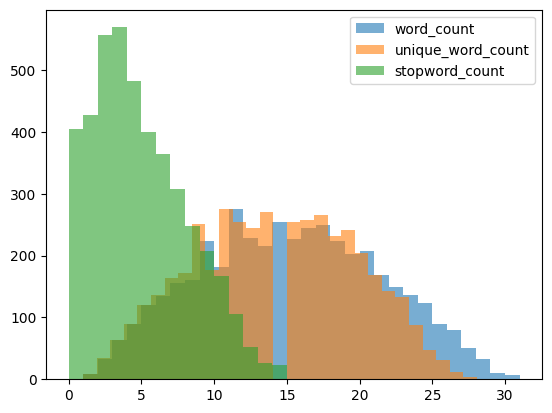

In [29]:
plt.hist(df_train['word_count'].loc[df_train['target']==0], bins=30, alpha=0.6)
plt.hist(df_train['unique_word_count'].loc[df_train['target']==0], bins=30, alpha=0.6)
plt.hist(df_train['stopword_count'].loc[df_train['target']==0], bins=15, alpha=0.6)
plt.legend(['word_count','unique_word_count','stopword_count'])
plt.show()

Visualizing 'word_count', 'unique_word_count', and 'stopword_count' column which 'Target' value = 1

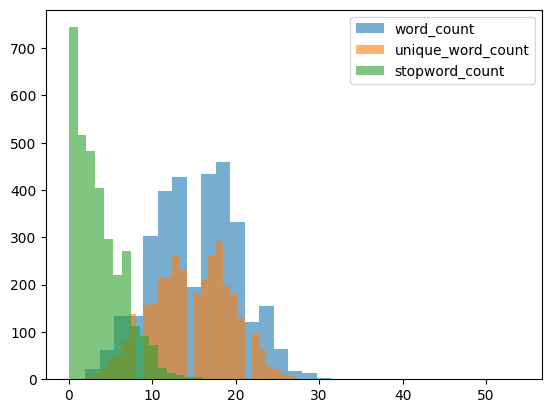

In [30]:
plt.hist(df_train['word_count'].loc[df_train['target']==1], bins=30, alpha=0.6)
plt.hist(df_train['unique_word_count'].loc[df_train['target']==1], bins=30, alpha=0.6)
plt.hist(df_train['stopword_count'].loc[df_train['target']==1], bins=15, alpha=0.6)
plt.legend(['word_count','unique_word_count','stopword_count'])
plt.show()

Create function to clean the text using re

In [31]:
def final_clean(text):
    url_pattern = r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*'
    text = re.sub(url_pattern, " ", text)
    text = re.sub(r'[^a-zA-Z0-9]', " ", text)
    text = re.sub(r' {2,}', " ", text)
    text = text.lower()
    return text

idx = 2224
print(df_train['text'][idx])
final_clean(df_train['text'][idx])

Audio: 16 Business Owners Share What They Would Do Differently Pt1 http://t.co/9uTqe9ZfDE


'audio 16 business owners share what they would do differently pt1 '

Apply the text-cleaning function

In [32]:
for data in [df_train, df_test]:
    data['text_clean'] = data['text'].apply(final_clean)

In [33]:
df_train['text_clean'][4]

'just got sent this photo from ruby alaska as smoke from wildfires pours into a school '

In [34]:
df_train.head()

,id,keyword,location,text,target,word_count,unique_word_count,stopword_count,url_count,mean_word_length,char_count,punc_count,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,0,4.384615,69,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429,38,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20,9,0,5.090909,133,3,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,9,1,0,6.333333,65,2,13 000 people receive wildfires evacuation ord...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,16,6,0,4.235294,88,2,just got sent this photo from ruby alaska as s...


## Modeling

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Input, Dropout
from sklearn.model_selection import train_test_split
import tensorflow as tf
#from tensorflow.keras.utils.np_utils import to_categorical

In [36]:
max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(df_train['text_clean'])

In [37]:
X = tokenizer.texts_to_sequences(df_train['text_clean'])

In [38]:
print(df_train['text_clean'][10], X[10])
print(df_train['text_clean'][1], X[1])

three people died from the heat wave so far [571, 60, 639, 21, 1, 282, 455, 32, 640]
forest fire near la ronge sask canada [192, 45, 226, 762, 6702, 6703, 1205]


In [39]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [40]:
vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)
X_tr = pad_sequences(X)

In [41]:
X_tr

array([[   0,    0,    0, ..., 4515,   85,   39],
       [   0,    0,    0, ..., 6702, 6703, 1205],
       [   0,    0,    0, ..., 1390,   23, 1095],
       ...,
       [   0,    0,    0, ...,    5,  544, 1594],
       [   0,    0,    0, ...,  130, 2031,  322],
       [   0,    0,    0, ...,  175,  705,   61]])

In [42]:
# X_tr = np.stack(X, axis=0)

In [43]:
print('Target 0:', sum(df_train['target']==0), 'Target 1:', sum(df_train['target']==1))

Target 0: 4342 Target 1: 3271


In [44]:
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize

In [45]:
# word_tokenize(df_train['text_clean'][0])

In [46]:
# X_tr.shape

In [47]:
# print(df_train['text_clean'][0])
# print(X_tr.toarray()[0].mean())

In [48]:
# #TFIDF
# tfidf = TfidfVectorizer()
# tfidf.fit(df_train['text_clean'])
# X_tr = bow.transform(df_train['text_clean'])
# X_tt = bow.transform(df_test['text_clean'])

In [49]:
y_tr = df_train['target'].to_numpy()
y_tr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=123)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(5709, 34) (1904, 34)
(5709,) (1904,)


In [51]:
max_len = max(df_train['word_count'])
max_len

54

In [52]:
# model = Sequential()
# model.add(Embedding(input_dim=16900, output_dim=1000))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(2, activation='sigmoid'))

# model= Sequential([
#     Input((16900,)),
#     #Embedding(16900, 1000),
#     Dense(512, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(1, activation='sigmoid')


# ])


# loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
# es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=50, restore_best_weights=True)

# model.compile(optimizer='sgd',
#               loss=loss_fn,
#               metrics=['accuracy'])
# model.summary()


In [53]:
# epoch = 10
# history = model.fit(
#     X_train,
#     y_train,
#     epochs=epoch,
#     batch_size=32,
#     validation_data=(X_val, y_val),
#     callbacks=[es])

### LSTM

In [66]:

embed_dim = 100
units = 64

model_lstm= tf.keras.models.Sequential()
model_lstm.add(Embedding(max_features, embed_dim, input_length=X_tr.shape[1]))
model_lstm.add(LSTM(units, dropout=0.2))
model_lstm.add(Dense(3, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)#, restore_best_weights=True)

model_lstm.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])
model_lstm.summary()


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
epoch = 10
history = model_lstm.fit(X_train, y_train, epochs=epoch, batch_size=10, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 3)

### NN

In [69]:

embed_dim = 100
epoch =100

model_nn= tf.keras.models.Sequential(
  [
      tf.keras.layers.Embedding(max_features, embed_dim, input_length=X_train.shape[1]),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ]
)

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=100, restore_best_weights=True)

sgd = tf.keras.optimizers.SGD(learning_rate=0.05)
model_nn.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])
model_nn.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model_nn.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5567 - loss: 0.6899 - val_accuracy: 0.5762 - val_loss: 0.6821
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5685 - loss: 0.6832 - val_accuracy: 0.5762 - val_loss: 0.6808
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5629 - loss: 0.6840 - val_accuracy: 0.5762 - val_loss: 0.6801
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5736 - loss: 0.6809 - val_accuracy: 0.5762 - val_loss: 0.6797
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5758 - loss: 0.6788 - val_accuracy: 0.5762 - val_loss: 0.6789
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5698 - loss: 0.6800 - val_accuracy: 0.5762 - val_loss: 0.6782
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5844 - loss: 0.6751 - val_accuracy: 0.5762 - val_loss: 0.6781
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5630 - loss: 0.6814 - 

In [59]:
result = history.history
n_epochs = np.arange(0, len(result['accuracy']))

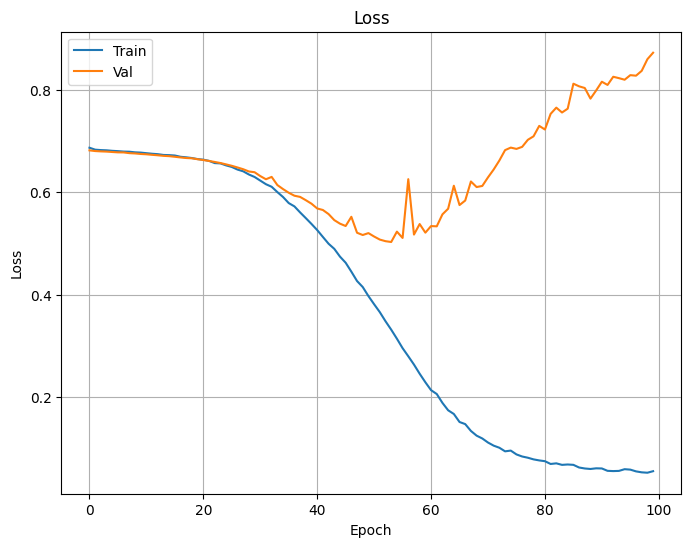

In [60]:
plt.figure(figsize=(8,6))
plt.title('Loss')
plt.plot(n_epochs, result['loss'])
plt.plot(n_epochs, result['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.grid()
plt.show()

#### Using BOW

In [61]:
#bag of words
bow = CountVectorizer()
bow.fit(df_train['text_clean'])
X_tr = bow.transform(df_train['text_clean'])
X_tt = bow.transform(df_test['text_clean'])

In [62]:
y_tr = df_train['target'].to_numpy()
y_tr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=123)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(5709, 16900) (1904, 16900)
(5709,) (1904,)


In [64]:

embed_dim = 100
epoch =100

model_nn_bow= tf.keras.models.Sequential(
  [
      tf.keras.layers.Embedding(max_features, embed_dim, input_length=X_train.shape[1]),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ]
)

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=20, restore_best_weights=True)

sgd = tf.keras.optimizers.SGD(learning_rate=0.05)
model_nn_bow.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])
model_nn_bow.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [65]:
#history = model_nn_bow.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), callbacks=[es])